In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

#           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0  1      Bulbasaur  Grass  Poison  45      49       49       65       65   
1  2        Ivysaur  Grass  Poison  60      62       63       80       80   
2  3       Venusaur  Grass  Poison  80      82       83      100      100   
3  4  Mega Venusaur  Grass  Poison  80     100      123      122      120   
4  5     Charmander   Fire     NaN  39      52       43       60       50   

   Speed  Generation  Legendary  
0     45           1      False  
1     60           1      False  
2     80           1      False  
3     80           1      False  
4     65           1      False

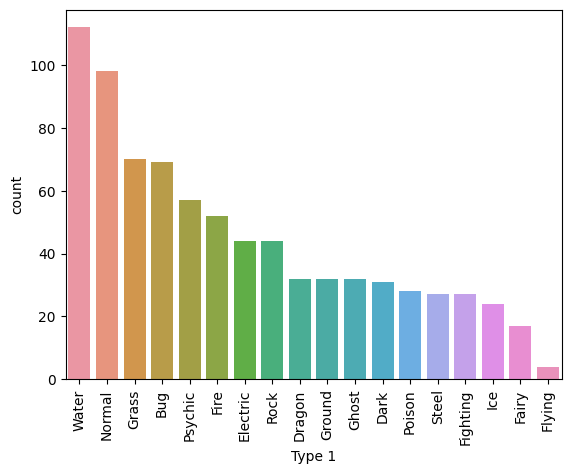

In [3]:
sns.countplot(x='Type 1', data=pokemon, order=pokemon['Type 1'].value_counts().index)
plt.xticks(rotation=90)
plt.show()


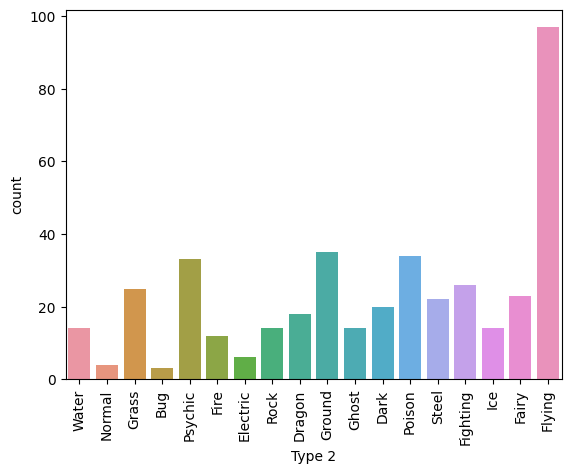

In [4]:
sns.countplot(x='Type 2', data=pokemon, order=pokemon['Type 1'].value_counts().index)
plt.xticks(rotation=90)
plt.show()


C:\Users\rober\AppData\Local\Temp\ipykernel_20488\2742787477.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  individual_types = individual_types.append({'Type': row['Type 1']}, ignore_index=True)
C:\Users\rober\AppData\Local\Temp\ipykernel_20488\2742787477.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  individual_types = individual_types.append({'Type': row['Type 2']}, ignore_index=True)
C:\Users\rober\AppData\Local\Temp\ipykernel_20488\2742787477.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  individual_types = individual_types.append({'Type': row['Type 1']}, ignore_index=True)
C:\Users\rober\AppData\Local\Temp\ipykernel_20488\2742787477.py:8: FutureWarning: The frame.append method is deprecated and will be r

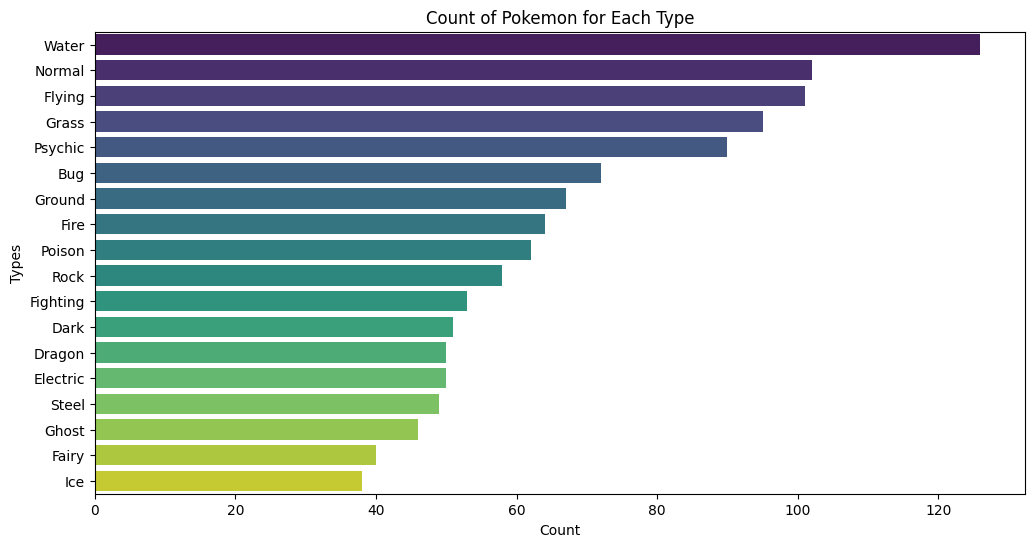

In [5]:
individual_types = pd.DataFrame()

# Iterate through the 'Type1' and 'Type2' columns to stack the individual types
for index, row in pokemon.iterrows():
    if isinstance(row['Type 1'], str):
        individual_types = individual_types.append({'Type': row['Type 1']}, ignore_index=True)
    if isinstance(row['Type 2'], str):
        individual_types = individual_types.append({'Type': row['Type 2']}, ignore_index=True)

# Count the occurrences of each type
type_counts = individual_types['Type'].value_counts().reset_index()
type_counts.columns = ['Type', 'Count']

# Create a Seaborn bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=type_counts, x='Count', y='Type', palette='viridis')
plt.xlabel('Count')
plt.ylabel('Types')
plt.title('Count of Pokemon for Each Type')
plt.show()


In [6]:
batallas = pd.read_csv('combats.csv')
batallas.head()

First_pokemon  Second_pokemon  Winner
0            266             298     298
1            702             701     701
2            191             668     668
3            237             683     683
4            151             231     151

In [7]:
pokemon['Total_stats'] = pokemon['HP'] + pokemon['Attack'] + pokemon['Defense'] + pokemon['Sp. Atk'] + pokemon['Sp. Def'] + pokemon['Speed']
print(pokemon.iloc[:, [1, -1]].head())

            Name  Total_stats
0      Bulbasaur          318
1        Ivysaur          405
2       Venusaur          525
3  Mega Venusaur          625
4     Charmander          309


C:\Users\rober\AppData\Local\Temp\ipykernel_20488\2218735162.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pokemon.Total_stats)


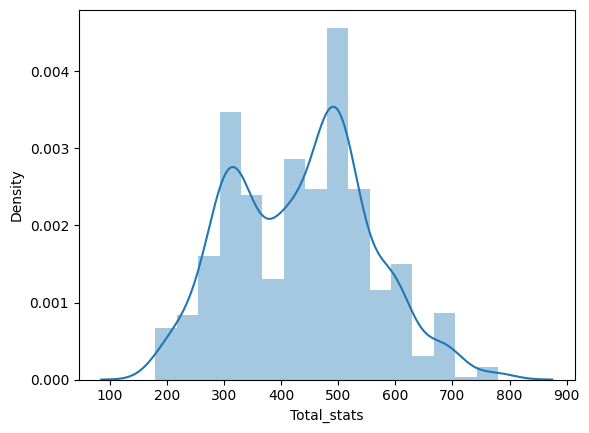

In [8]:
sns.distplot(pokemon.Total_stats)
plt.show()

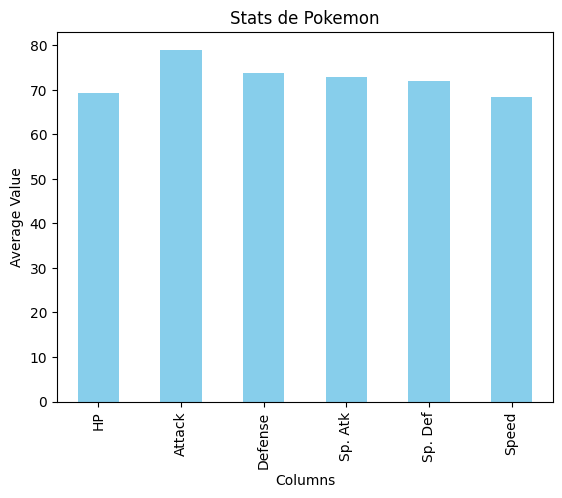

In [9]:
explorar = pokemon[['HP'	,'Attack',	'Defense',	'Sp. Atk',	'Sp. Def',	'Speed']]

average_values = explorar.mean(axis=0)

# Plot the average values
average_values.plot(kind='bar', color='skyblue')
plt.title('Stats de Pokemon')
plt.xlabel('Columns')
plt.ylabel('Average Value')
plt.show()

In [10]:
pokemon['Legendary'] = pokemon['Legendary'].map({False: 0, True:1})
pokemon['Type 2'] = pokemon['Type 2'].fillna('None')

In [11]:
type_df = pokemon.iloc[:, 0:4]
names = type_df[['#','Name']]
print(names)
type_df = type_df.drop('Name', axis=1)
stats_df = pokemon.drop(['Type 1', 'Type 2', 'Name', 'Generation', 'Total_stats'], axis=1)

type_dict = type_df.set_index('#').T.to_dict('list')
stats_dict = stats_df.set_index('#').T.to_dict('list')
print(pd.DataFrame.from_dict(type_dict, orient='index'))
print(pd.DataFrame.from_dict(stats_dict, orient='index'))

       #            Name
0      1       Bulbasaur
1      2         Ivysaur
2      3        Venusaur
3      4   Mega Venusaur
4      5      Charmander
..   ...             ...
795  796         Diancie
796  797    Mega Diancie
797  798  Hoopa Confined
798  799   Hoopa Unbound
799  800       Volcanion

[800 rows x 2 columns]
           0       1
1      Grass  Poison
2      Grass  Poison
3      Grass  Poison
4      Grass  Poison
5       Fire    None
..       ...     ...
796     Rock   Fairy
797     Rock   Fairy
798  Psychic   Ghost
799  Psychic    Dark
800     Fire   Water

[800 rows x 2 columns]
      0    1    2    3    4    5  6
1    45   49   49   65   65   45  0
2    60   62   63   80   80   60  0
3    80   82   83  100  100   80  0
4    80  100  123  122  120   80  0
5    39   52   43   60   50   65  0
..   ..  ...  ...  ...  ...  ... ..
796  50  100  150  100  150   50  1
797  50  160  110  160  110  110  1
798  80  110   60  150  130   70  1
799  80  160   60  170  130   80  1
800 

In [12]:
def replace_things(data):
    #map each battles to pokemon data
    print(data.columns)
    
    data['First_pokemon_stats'] = data.First_pokemon.map(stats_dict)
    data['Second_pokemon_stats'] = data.Second_pokemon.map(stats_dict)

    data['First_Name'] = data['First_pokemon']
    data['Second_Name'] = data['Second_pokemon']

    data['First'] = data['First_pokemon']
    data['Second'] = data['Second_pokemon']

    data.rename(columns = {'First_Name':'#'}, inplace = True)
    data = data.merge(pokemon, on='#', how='left')
    data = data.drop(['#','Name'	,'Type 1'	,'Type 2'	,'HP'	,'Attack',	'Defense',	'Sp. Atk'	,'Sp. Def',	'Speed'], axis=1)
    data.rename(columns = {'Generation': 'Generation1','Legendary':'Legendary1'}, inplace = True)

    data.rename(columns = {'Second_Name':'#'}, inplace = True)
    data = data.merge(pokemon, on='#', how='left')
    data = data.drop(['#','Name'	,'Type 1'	,'Type 2'	,'HP'	,'Attack',	'Defense',	'Sp. Atk'	,'Sp. Def',	'Speed'], axis=1)
    data.rename(columns = {'Generation': 'Generation2','Legendary':'Legendary2'}, inplace = True)



    data['First_pokemon'] = data.First_pokemon.map(type_dict)
    data['Second_pokemon'] = data.Second_pokemon.map(type_dict)

    

    data[['Type1','Type2']] = pd.DataFrame(data.First_pokemon.tolist(), index= data.index)
    data[['Type1_OP','Type2_OP']] = pd.DataFrame(data.Second_pokemon.tolist(), index= data.index)



    return data

In [13]:
def calculate_effectiveness(data):
    very_effective_dict = {'Normal': [],
                           'Fighting': ['Normal', 'Rock', 'Steel', 'Ice', 'Dark'],
                           'Flying': ['Fighting', 'Bug', 'Grass'],
                           'Poison': ['Grass', 'Fairy'],
                           'Ground': ['Poison', 'Rock', 'Steel', 'Fire', 'Electric'],
                           'Rock': ['Flying', 'Bug', 'Fire', 'Ice'],
                           'Bug': ['Grass', 'Psychic', 'Dark'],
                           'Ghost': ['Ghost', 'Psychic'],
                           'Steel': ['Rock', 'Ice', 'Fairy'],
                           'Fire': ['Bug', 'Steel', 'Grass', 'Ice'],
                           'Water': ['Ground', 'Rock', 'Fire'],
                           'Grass': ['Ground', 'Rock', 'Water'],
                           'Electric': ['Flying', 'Water'],
                           'Psychic': ['Fighting', 'Poison'],
                           'Ice': ['Flying', 'Ground', 'Grass', 'Dragon'],
                           'Dragon': ['Dragon'],
                           'Dark': ['Ghost', 'Psychic'],
                           'Fairy': ['Fighting', 'Dragon', 'Dark'],
                           'None': []}

    not_very_effective_dict = {'Normal': ['Rock', 'Steel'],
                               'Fighting': ['Flying', 'Poison', 'Bug', 'Psychic', 'Fairy'],
                               'Flying': ['Rock', 'Steel', 'Electric'],
                               'Poison': ['Poison', 'Rock', 'Ground', 'Ghost'],
                               'Ground': ['Bug', 'Grass'],
                               'Rock': ['Fighting', 'Ground', 'Steel'],
                               'Bug': ['Fighting', 'Flying', 'Poison', 'Ghost', 'Steel', 'Fire', 'Fairy'],
                               'Ghost': ['Dark'],
                               'Steel': ['Steel', 'Fire', 'Water', 'Electric'],
                               'Fire': ['Rock', 'Fire', 'Water', 'Dragon'],
                               'Water': ['Water', 'Grass', 'Dragon'],
                               'Grass': ['Flying', 'Poison', 'Bug', 'Steel', 'Fire', 'Grass', 'Dragon'],
                               'Electric': ['Grass', 'Electric', 'Dragon'],
                               'Psychic': ['Steel', 'Psychic'],
                               'Ice': ['Steel', 'Fire', 'Water', 'Psychic'],
                               'Dragon': ['Steel'],
                               'Dark': ['Fighting', 'Dark', 'Fairy'],
                               'Fairy': ['Posion', 'Steel', 'Fire'],
                               'None': []}

    not_effective_dict = {'Normal': ['Ghost'],
                          'Fighting': ['Ghost'],
                          'Flying': [],
                          'Poison': ['Steel'],
                          'Ground': ['Flying'],
                          'Rock': [],
                          'Bug': [],
                          'Ghost': ['Normal'],
                          'Steel': [],
                          'Fire': [],
                          'Water': [],
                          'Grass': [],
                          'Electric': ['Ground'],
                          'Psychic': ['Dark'],
                          'Ice': [],
                          'Dragon': ['Fairy'],
                          'Dark': [],
                          'Fairy': [],
                          'None': []}

    p1_type1_list = []
    p1_type2_list = []
    p2_type1_list = []
    p2_type2_list = []

    for row in data.itertuples():
        nested_type = [[1, 1], [1, 1]]

        #manipulating values if found on dictionary
        for i in range(0,2):
            for j in range(0,2):
                if row.Second_pokemon[j] in very_effective_dict.get(row.First_pokemon[i]):
                    nested_type[0][i] *= 2
                if row.Second_pokemon[j] in not_very_effective_dict.get(row.First_pokemon[i]):
                    nested_type[0][i] /= 2
                if row.Second_pokemon[j] in not_effective_dict.get(row.First_pokemon[i]):
                    nested_type[0][i] *= 0

                if row.First_pokemon[j] in very_effective_dict.get(row.Second_pokemon[i]):
                    nested_type[1][i] *= 2
                if row.First_pokemon[j] in not_very_effective_dict.get(row.Second_pokemon[i]):
                    nested_type[1][i] /= 2
                if row.First_pokemon[j] in not_effective_dict.get(row.Second_pokemon[i]):
                    nested_type[1][i] *= 0

        p1_type1_list.append(nested_type[0][0])
        p1_type2_list.append(nested_type[0][1])
        p2_type1_list.append(nested_type[1][0])
        p2_type2_list.append(nested_type[1][1])

    data = data.assign(P1_type1=p1_type1_list, P1_type2=p1_type2_list, P2_type1=p2_type1_list, P2_type2=p2_type2_list)
    data = data.drop(['First_pokemon', 'Second_pokemon'], axis=1)

    return data

In [14]:
combats = pd.read_csv('combats.csv')
combats.head()


First_pokemon  Second_pokemon  Winner
0            266             298     298
1            702             701     701
2            191             668     668
3            237             683     683
4            151             231     151

In [15]:
combats['Winner_Label'] = np.where(combats['Winner'] == combats['First_pokemon'], 0, 1)

# or using np.select
conditions = [combats['Winner'] == combats['First_pokemon'], combats['Winner'] == combats['Second_pokemon']]
choices = [0, 1]

combats['Winner_Label'] = np.select(conditions, choices, default=np.nan)
combats.head()

First_pokemon  Second_pokemon  Winner  Winner_Label
0            266             298     298           1.0
1            702             701     701           1.0
2            191             668     668           1.0
3            237             683     683           1.0
4            151             231     151           0.0

In [16]:
print(combats.head())
train_df = replace_things(combats)


   First_pokemon  Second_pokemon  Winner  Winner_Label
0            266             298     298           1.0
1            702             701     701           1.0
2            191             668     668           1.0
3            237             683     683           1.0
4            151             231     151           0.0
Index(['First_pokemon', 'Second_pokemon', 'Winner', 'Winner_Label'], dtype='object')


In [17]:
def calculate_stats(data):
    #calculate stats difference
    
    stats_col = ['HP_diff', 'Attack_diff', 'Defense_diff', 'Sp.Atk_diff', 'Sp.Def_diff', 'Speed_diff', 'Legendary_diff']
    diff_list = []

    for row in data.itertuples():
        diff_list.append(np.array(row.First_pokemon_stats) - np.array(row.Second_pokemon_stats))

    stats_df = pd.DataFrame(diff_list, columns=stats_col)
    data = pd.concat([data, stats_df], axis=1)
    data.drop(['First_pokemon_stats', 'Second_pokemon_stats'], axis=1, inplace=True)

    return data

In [18]:
train_df = calculate_stats(train_df)
train_df = calculate_effectiveness(train_df)
train_df['Type1'] = train_df['Type1'].map({'Normal': 0, 'Fire': 1, 'Water': 2, 'Grass': 3, 'Flying' : 4, 'Fighting': 5, 'Poison':6, 'Electric':7, 'Ground':8, 'Rock':9, 'Psychic':10, 'Ice': 11, 'Bug': 12, 'Ghost': 13, 'Steel': 14, 'Dragon': 15, 'Dark': 16, 'Fairy': 17})
train_df['Type2'] = train_df['Type2'].map({'Normal': 0, 'Fire': 1, 'Water': 2, 'Grass': 3, 'Flying' : 4, 'Fighting': 5, 'Poison':6, 'Electric':7, 'Ground':8, 'Rock':9, 'Psychic':10, 'Ice': 11, 'Bug': 12, 'Ghost': 13, 'Steel': 14, 'Dragon': 15, 'Dark': 16, 'Fairy': 17, 'None': 18})
train_df['Type1_OP'] = train_df['Type1_OP'].map({'Normal': 0, 'Fire': 1, 'Water': 2, 'Grass': 3, 'Flying' : 4, 'Fighting': 5, 'Poison':6, 'Electric':7, 'Ground':8, 'Rock':9, 'Psychic':10, 'Ice': 11, 'Bug': 12, 'Ghost': 13, 'Steel': 14, 'Dragon': 15, 'Dark': 16, 'Fairy': 17})
train_df['Type2_OP'] = train_df['Type2_OP'].map({'Normal': 0, 'Fire': 1, 'Water': 2, 'Grass': 3, 'Flying' : 4, 'Fighting': 5, 'Poison':6, 'Electric':7, 'Ground':8, 'Rock':9, 'Psychic':10, 'Ice': 11, 'Bug': 12, 'Ghost': 13, 'Steel': 14, 'Dragon': 15, 'Dark': 16, 'Fairy': 17, 'None': 18})

train_df.head(5)


Winner  Winner_Label  First  Second  Generation1  Legendary1  \
0     298           1.0    266     298            2           0   
1     701           1.0    702     701            5           1   
2     668           1.0    191     668            2           0   
3     683           1.0    237     683            2           0   
4     151           0.0    151     231            1           0   

   Total_stats_x  Generation2  Legendary2  Total_stats_y  ...  Attack_diff  \
0            300            3           0            340  ...           -6   
1            580            5           1            580  ...          -39   
2            405            5           0            485  ...          -35   
3            250            5           0            485  ...          -80   
4            495            2           0            505  ...           50   

   Defense_diff  Sp.Atk_diff  Sp.Def_diff  Speed_diff  Legendary_diff  \
0            10          -15           10         -19               0   
1           -18           18           39           0               0   
2            10          -45           10           0               0   
3           -50           10          -50         -28               0   
4          -105          105         -160          50               0   

   P1_type1  P1_type2  P2_type1  P2_type2  
0       1.0       0.5       4.0       1.0  
1       2.0       2.0       0.5       1.0  
2       1.0       1.0       1.0       1.0  
3       0.5       1.0       1.0       1.0  
4       2.0       2.0       1.0       1.0  

[5 rows x 25 columns]

In [19]:
train_df=train_df.drop(['Winner', 'Total_stats_x','Total_stats_y' ], axis=1)
print(train_df.columns)

Index(['Winner_Label', 'First', 'Second', 'Generation1', 'Legendary1',
       'Generation2', 'Legendary2', 'Type1', 'Type2', 'Type1_OP', 'Type2_OP',
       'HP_diff', 'Attack_diff', 'Defense_diff', 'Sp.Atk_diff', 'Sp.Def_diff',
       'Speed_diff', 'Legendary_diff', 'P1_type1', 'P1_type2', 'P2_type1',
       'P2_type2'],
      dtype='object')


In [20]:
train_df.head(5)

Winner_Label  First  Second  Generation1  Legendary1  Generation2  \
0           1.0    266     298            2           0            3   
1           1.0    702     701            5           1            5   
2           1.0    191     668            2           0            5   
3           1.0    237     683            2           0            5   
4           0.0    151     231            1           0            2   

   Legendary2  Type1  Type2  Type1_OP  ...  Attack_diff  Defense_diff  \
0           0      9      8         3  ...           -6            10   
1           1      3      5         9  ...          -39           -18   
2           0     17      4        10  ...          -35            10   
3           0      1     18        15  ...          -80           -50   
4           0      9      2        12  ...           50          -105   

   Sp.Atk_diff  Sp.Def_diff  Speed_diff  Legendary_diff  P1_type1  P1_type2  \
0          -15           10         -19               0       1.0       0.5   
1           18           39           0               0       2.0       2.0   
2          -45           10           0               0       1.0       1.0   
3           10          -50         -28               0       0.5       1.0   
4          105         -160          50               0       2.0       2.0   

   P2_type1  P2_type2  
0       4.0       1.0  
1       0.5       1.0  
2       1.0       1.0  
3       1.0       1.0  
4       1.0       1.0  

[5 rows x 22 columns]

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, GaussianDropout
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, PReLU, ELU
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.layers import Activation

In [22]:
from sklearn.preprocessing import MinMaxScaler

X = train_df.drop(['Winner_Label', 'First', 'Second'], axis=1)
y = train_df[['Winner_Label', 'First', 'Second']]
X[['Generation1', 'Legendary1',
        'Generation2', 'Legendary2', 'Type1', 'Type2', 'Type1_OP', 'Type2_OP']] = X[['Generation1', 'Legendary1',
        'Generation2', 'Legendary2', 'Type1', 'Type2', 'Type1_OP', 'Type2_OP']].astype('category')
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = X.select_dtypes(include=['category']).columns

# Apply Min-Max Scaling to numerical columns
scaler = MinMaxScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

print(X.dtypes)


Generation1       category
Legendary1        category
Generation2       category
Legendary2        category
Type1             category
Type2             category
Type1_OP          category
Type2_OP          category
HP_diff              int32
Attack_diff          int32
Defense_diff         int32
Sp.Atk_diff          int32
Sp.Def_diff          int32
Speed_diff           int32
Legendary_diff       int32
P1_type1           float64
P1_type2           float64
P2_type1           float64
P2_type2           float64
dtype: object


In [23]:
from sklearn.preprocessing import Normalizer, MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80)
# Separate 'First' and 'Second' features in the training set
print(y_train)

from tensorflow.keras.optimizers import Adam

# Example with Adam optimizer and a custom learning rate
custom_learning_rate = 0.005
custom_optimizer = Adam(learning_rate=custom_learning_rate)

       Winner_Label  First  Second
25838           0.0    125     683
27979           0.0    278     374
42071           0.0    543     405
16589           0.0    488     780
24949           0.0    723     759
...             ...    ...     ...
8714            1.0    775       7
35027           0.0    638     231
19366           1.0    559     467
38076           1.0    445     269
17583           0.0    228     579

[40000 rows x 3 columns]


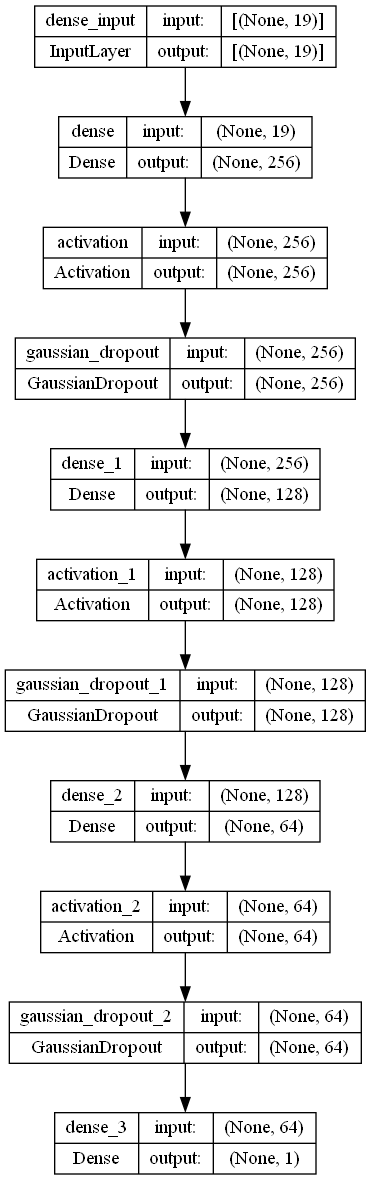

In [24]:
from tensorflow.keras.utils import plot_model
model1 = Sequential()

model1.add(Dense(256, input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.01)))
model1.add(Activation('relu'))
model1.add(GaussianDropout(0.3))

model1.add(Dense(128, kernel_regularizer=regularizers.l2(0.01)))
model1.add(Activation('relu'))
model1.add(GaussianDropout(0.3))

model1.add(Dense(64, kernel_regularizer=regularizers.l2(0.01)))
model1.add(Activation('relu'))
model1.add(GaussianDropout(0.3))

model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
plot_model(model1, to_file = 'grafica_modelo.png', show_shapes = True, show_layer_names = True)

In [25]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
history1 = model1.fit(X_train, y_train['Winner_Label'], epochs=200, batch_size=50, validation_split=0.25, verbose=2)

print("Perdida de entrenamiento del modelo 1:" + str({history1.history['loss'][-1]}) + "\n")
loss1 = model1.evaluate(X_test, y_test['Winner_Label'])
print("Perdida de prueba del modelo 1:" + str(loss1))

Epoch 1/200
600/600 - 2s - loss: 2.1131 - accuracy: 0.8499 - val_loss: 1.0590 - val_accuracy: 0.9257 - 2s/epoch - 4ms/step
Epoch 2/200
600/600 - 1s - loss: 0.7318 - accuracy: 0.9095 - val_loss: 0.4440 - val_accuracy: 0.9330 - 1s/epoch - 2ms/step
Epoch 3/200
600/600 - 1s - loss: 0.3900 - accuracy: 0.9204 - val_loss: 0.3003 - val_accuracy: 0.9294 - 1s/epoch - 2ms/step
Epoch 4/200
600/600 - 1s - loss: 0.2980 - accuracy: 0.9257 - val_loss: 0.2601 - val_accuracy: 0.9318 - 1s/epoch - 2ms/step
Epoch 5/200
600/600 - 1s - loss: 0.2732 - accuracy: 0.9278 - val_loss: 0.2385 - val_accuracy: 0.9417 - 1s/epoch - 2ms/step
Epoch 6/200
600/600 - 1s - loss: 0.2620 - accuracy: 0.9283 - val_loss: 0.2404 - val_accuracy: 0.9339 - 1s/epoch - 2ms/step
Epoch 7/200
600/600 - 1s - loss: 0.2597 - accuracy: 0.9284 - val_loss: 0.2312 - val_accuracy: 0.9374 - 1s/epoch - 2ms/step
Epoch 8/200
600/600 - 1s - loss: 0.2583 - accuracy: 0.9283 - val_loss: 0.2298 - val_accuracy: 0.9367 - 1s/epoch - 2ms/step
Epoch 9/200
600/

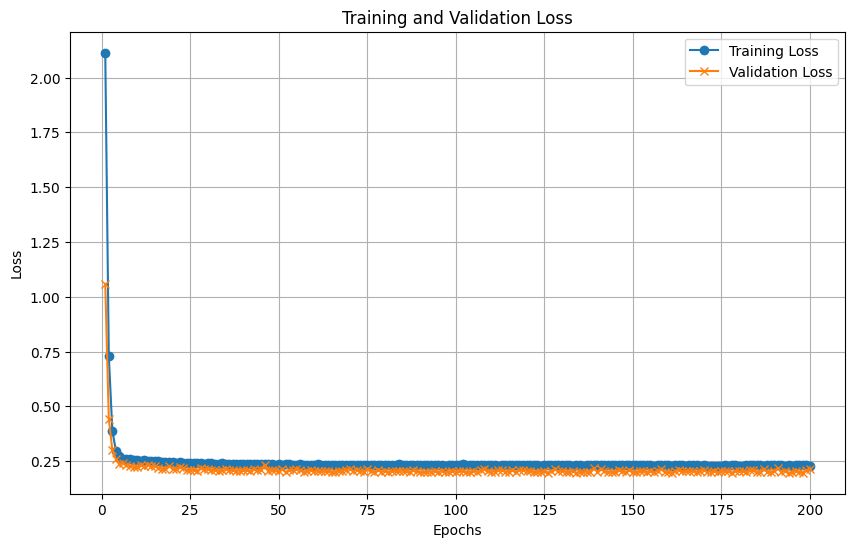

In [26]:
training_loss = history1.history['loss']
validation_loss = history1.history['val_loss']

# Create a range of epochs for the x-axis
epochs = range(1, len(training_loss) + 1)

# Plot the training and validation loss on the same graph
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='x')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

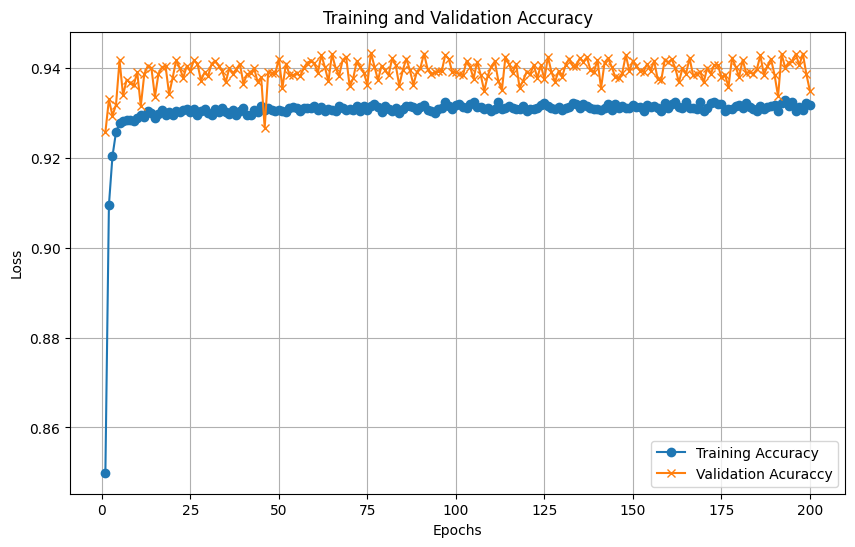

In [52]:
training_loss = history1.history['accuracy']
validation_loss = history1.history['val_accuracy']

# Create a range of epochs for the x-axis
epochs = range(1, len(training_loss) + 1)

# Plot the training and validation loss on the same graph
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, label='Training Accuracy', marker='o')
plt.plot(epochs, validation_loss, label='Validation Acuraccy', marker='x')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
import shap
shap.initjs()
explainer = shap.KernelExplainer(model1, X_train.iloc[:50,:])

shap_values = explainer.shap_values(X_train.iloc[20,:], nsamples=500)



shap.force_plot(explainer.expected_value, shap_values[0], X_train.iloc[20,:])


  0%|          | 0/100 [00:00<?, ?it/s]

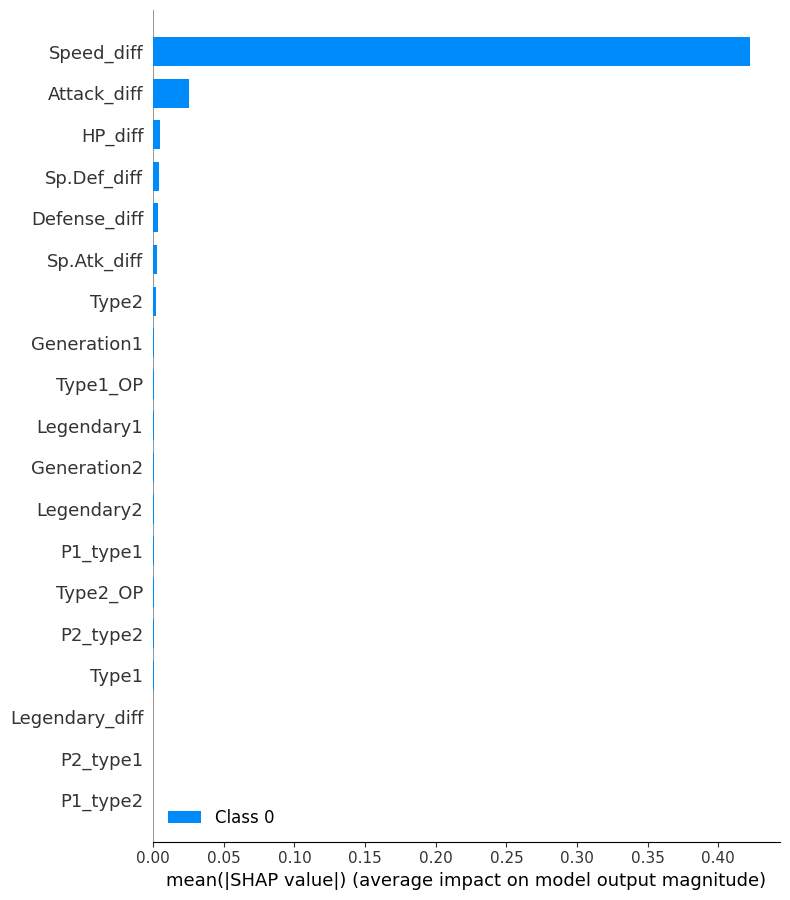

In [29]:
explainer = shap.KernelExplainer(model1, X_test[:100])

shap_values = explainer.shap_values(X_test[:100], nsamples=100)



shap.summary_plot(shap_values, X_test[:100])



In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, classification_report, precision_score

y_pred = model1.predict(X_test)
print(y_pred)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_tests =y_test['Winner_Label']

conf_matrix = confusion_matrix(y_tests, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy = accuracy_score(y_tests, y_pred)
print("\nAccuracy:", accuracy)

# Precision
precision = precision_score(y_tests, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_tests, y_pred)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_tests, y_pred)
print("F1 Score:", f1)

313/313 [==============================] - 0s 811us/step
[[0.07181641]
 [0.04367062]
 [0.8020973 ]
 ...
 [0.04367062]
 [0.9908614 ]
 [0.07565117]]
Confusion Matrix:
[[4491  304]
 [ 380 4825]]

Accuracy: 0.9316
Precision: 0.9407291869760187
Recall: 0.9269932756964457
F1 Score: 0.9338107218889105


In [31]:
y_pred_df = pd.DataFrame(data={'Predicted': y_pred.flatten()})

# Concatenate y_pred_df with y_tests
results_df = pd.concat([y_tests.reset_index(drop=True), y_pred_df], axis=1)

# Compare actual vs. predicted
misclassified = results_df[results_df['Winner_Label'] != results_df['Predicted']]

# Display misclassified instances
print("Misclassified instances:")
print(misclassified)

# Print confusion matrix and classification report
conf_matrix = confusion_matrix(y_tests, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

classification_rep = classification_report(y_tests, y_pred)
print("Classification Report:")
print(classification_rep)

Misclassified instances:
      Winner_Label  Predicted
27             1.0          0
67             0.0          1
68             1.0          0
85             1.0          0
94             1.0          0
...            ...        ...
9931           0.0          1
9955           0.0          1
9958           1.0          0
9981           0.0          1
9990           1.0          0

[684 rows x 2 columns]
Confusion Matrix:
[[4491  304]
 [ 380 4825]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93      4795
         1.0       0.94      0.93      0.93      5205

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [32]:
import shap
shap.initjs()
misclassified_indices = results_df.index[results_df['Winner_Label'] != results_df['Predicted']].to_numpy()
X_misclassified = X_test.iloc[misclassified_indices, :]
y_misclassified = y_test.iloc[misclassified_indices]

# Explain predictions on the misclassified instances
explainer = shap.KernelExplainer(model1, X_misclassified)
shap_values = explainer.shap_values(X_misclassified, nsamples=100)



Using 684 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/684 [00:00<?, ?it/s]

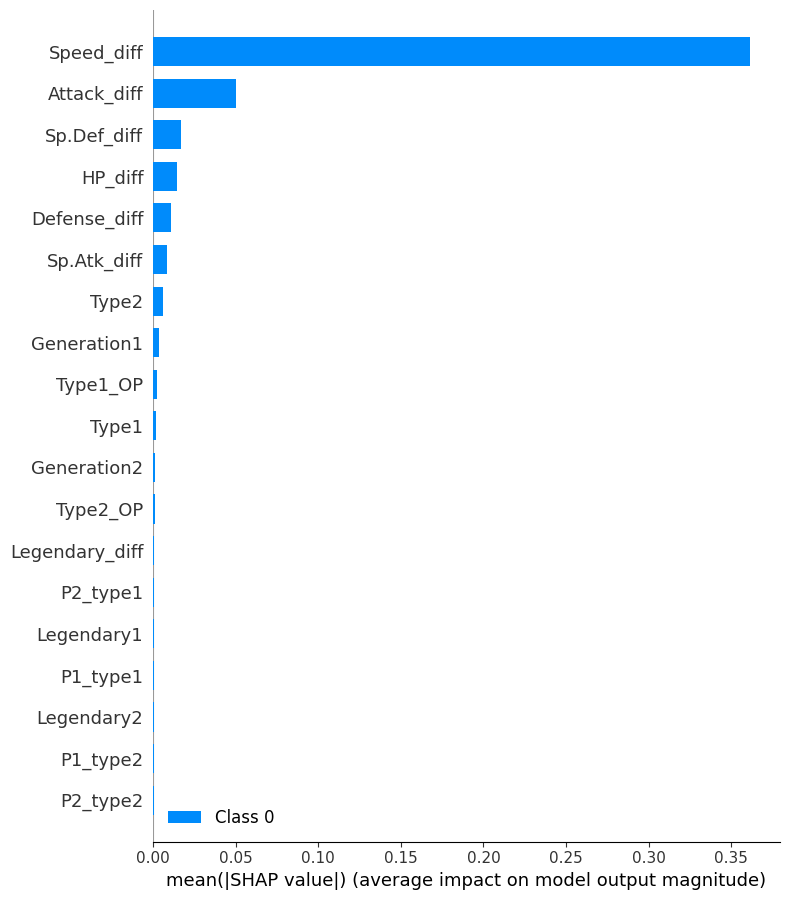

In [33]:
shap.summary_plot(shap_values, X_misclassified, plot_type='bar')

In [34]:
instance_index = 0  # Adjust this index based on the instance you want to visualize
shap.force_plot(explainer.expected_value[0], shap_values[0][instance_index, :], X_misclassified.iloc[instance_index, :])

In [35]:
'''model2 = Sequential()

model2.add(Dense(64, input_shape=(X_train.shape[1],),kernel_regularizer=regularizers.l2(0.01)))
model2.add(Activation('relu'))
model2.add(GaussianDropout(0.3))

model2.add(Dense(32, kernel_regularizer=regularizers.l2(0.01)))
model2.add(Activation('relu'))
model2.add(GaussianDropout(0.3))

model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])'''

"model2 = Sequential()\n\nmodel2.add(Dense(64, input_shape=(X_train.shape[1],),kernel_regularizer=regularizers.l2(0.01)))\nmodel2.add(Activation('relu'))\nmodel2.add(GaussianDropout(0.3))\n\nmodel2.add(Dense(32, kernel_regularizer=regularizers.l2(0.01)))\nmodel2.add(Activation('relu'))\nmodel2.add(GaussianDropout(0.3))\n\nmodel2.add(Dense(1, activation='sigmoid'))\nmodel2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])"

In [36]:
'''history2 = model2.fit(X_train, y_train['Winner_Label'], epochs=200, batch_size=50, validation_split=0.25, verbose=2)

print("Perdida de entrenamiento del modelo 1:" + str({history2.history['loss'][-1]}) + "\n")
loss2 = model2.evaluate(X_test, y_test['Winner_Label'])
print("Perdida de prueba del modelo 1:" + str(loss2))'''

'history2 = model2.fit(X_train, y_train[\'Winner_Label\'], epochs=200, batch_size=50, validation_split=0.25, verbose=2)\n\nprint("Perdida de entrenamiento del modelo 1:" + str({history2.history[\'loss\'][-1]}) + "\n")\nloss2 = model2.evaluate(X_test, y_test[\'Winner_Label\'])\nprint("Perdida de prueba del modelo 1:" + str(loss2))'

In [37]:
'''y_pred = model2.predict(X_test)

y_pred = np.where(y_pred > 0.5, 1, 0)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)'''

'y_pred = model2.predict(X_test)\n\ny_pred = np.where(y_pred > 0.5, 1, 0)\n\nconf_matrix = confusion_matrix(y_test, y_pred)\nprint("Confusion Matrix:")\nprint(conf_matrix)\n\n# Accuracy\naccuracy = accuracy_score(y_test, y_pred)\nprint("\nAccuracy:", accuracy)\n\n# Precision\nprecision = precision_score(y_test, y_pred)\nprint("Precision:", precision)\n\n# Recall\nrecall = recall_score(y_test, y_pred)\nprint("Recall:", recall)\n\n# F1 Score\nf1 = f1_score(y_test, y_pred)\nprint("F1 Score:", f1)'

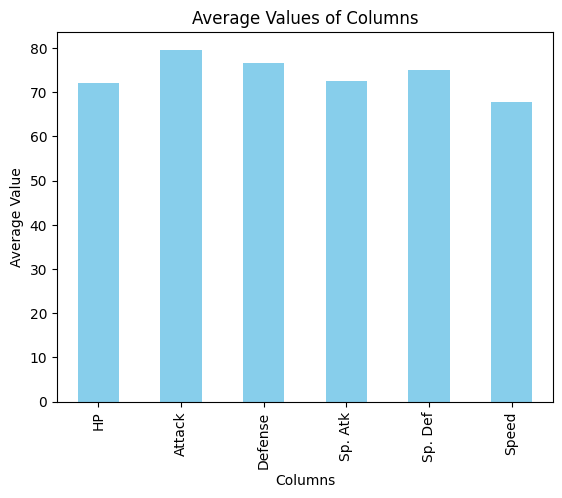

In [38]:
# Merge based on indices
merged_df = pd.merge(misclassified, y_test, left_index=True, right_index=True)

# Display the merged DataFrame

merged_df['Winner_Label_y'] = np.where(merged_df['Predicted'] == 0, merged_df['First'], merged_df['Second'])
merged_df.rename(columns = {'Winner_Label_y':'#'}, inplace = True)
merged_df= merged_df.merge(pokemon, on='#', how='left')
tests = merged_df[['HP'	,'Attack',	'Defense',	'Sp. Atk',	'Sp. Def',	'Speed']]

average_values = tests.mean(axis=0)

# Plot the average values
average_values.plot(kind='bar', color='skyblue')
plt.title('Average Values of Columns')
plt.xlabel('Columns')
plt.ylabel('Average Value')
plt.show()


In [39]:
print(y_pred.reshape(-1))
g = {"Winning": y_pred.reshape(-1)}
h = pd.DataFrame(g)
print(h)
y_test['Winning'] = np.where(h['Winning'] == 0, y_test['First'], y_test['Second'])
print(y_test)


[0 0 1 ... 0 1 0]
      Winning
0           0
1           0
2           1
3           1
4           1
...       ...
9995        1
9996        0
9997        0
9998        1
9999        0

[10000 rows x 1 columns]
       Winner_Label  First  Second  Winning
49296           0.0    132     628      132
30488           0.0    276     603      276
24600           1.0    713     109      109
47448           1.0    323     369      369
29948           1.0    667      55       55
...             ...    ...     ...      ...
1374            1.0    299     341      341
23646           0.0    391     318      391
36196           0.0    230     242      230
49283           1.0    195       9        9
25              0.0    270     708      270

[10000 rows x 4 columns]


In [40]:
y_test['Winning'] = np.where(h['Winning'] == 0, y_test['First'], y_test['Second'])
y_test.rename(columns = {'Winning':'#'}, inplace = True)
y_test= y_test.merge(pokemon, on='#', how='left')


In [41]:
y_test

Winner_Label  First  Second    #              Name    Type 1  Type 2  \
0              0.0    132     628  132          Mr. Mime   Psychic   Fairy   
1              0.0    276     603  276     Mega Sceptile     Grass  Dragon   
2              1.0    713     109  109           Voltorb  Electric    None   
3              1.0    323     369  369           Seviper    Poison    None   
4              1.0    667      55   55          Venomoth       Bug  Poison   
...            ...    ...     ...  ...               ...       ...     ...   
9995           1.0    299     341  341            Plusle  Electric    None   
9996           0.0    391     318  391           Tropius     Grass  Flying   
9997           0.0    230     242  230       Mega Scizor       Bug   Steel   
9998           1.0    195       9    9  Mega Charizard Y      Fire  Flying   
9999           0.0    270     708  270             Lugia   Psychic  Flying   

       HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  \
0      40      45       65      100      120     90           1          0   
1      70     110       75      145       85    145           3          0   
2      40      30       50       55       55    100           1          0   
3      73     100       60      100       60     65           3          0   
4      70      65       60       90       75     90           1          0   
...   ...     ...      ...      ...      ...    ...         ...        ...   
9995   60      50       40       85       75     95           3          0   
9996   99      68       83       72       87     51           3          0   
9997   70     150      140       65      100     75           2          0   
9998   78     104       78      159      115    100           1          0   
9999  106      90      130       90      154    110           2          1   

      Total_stats  
0             460  
1             630  
2             330  
3             458  
4             450  
...           ...  
9995          405  
9996          460  
9997          600  
9998          634  
9999          680  

[10000 rows x 16 columns]

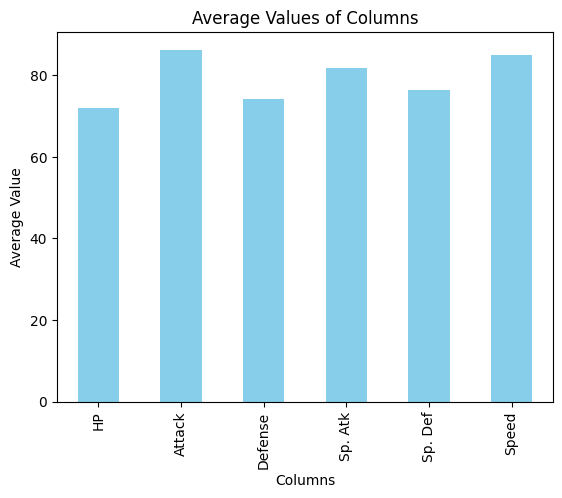

In [42]:
tests = y_test[['HP'	,'Attack',	'Defense',	'Sp. Atk',	'Sp. Def',	'Speed']]

average_values = tests.mean(axis=0)

# Plot the average values
average_values.plot(kind='bar', color='skyblue')
plt.title('Average Values of Columns')
plt.xlabel('Columns')
plt.ylabel('Average Value')
plt.show()

In [43]:
tests = pd.read_csv('tests.csv')
test_df = replace_things(tests)
test_df = calculate_stats(test_df)
test_df = calculate_effectiveness(test_df)
test_df['Type1'] = test_df['Type1'].map({'Normal': 0, 'Fire': 1, 'Water': 2, 'Grass': 3, 'Flying' : 4, 'Fighting': 5, 'Poison':6, 'Electric':7, 'Ground':8, 'Rock':9, 'Psychic':10, 'Ice': 11, 'Bug': 12, 'Ghost': 13, 'Steel': 14, 'Dragon': 15, 'Dark': 16, 'Fairy': 17})
test_df['Type2'] = test_df['Type2'].map({'Normal': 0, 'Fire': 1, 'Water': 2, 'Grass': 3, 'Flying' : 4, 'Fighting': 5, 'Poison':6, 'Electric':7, 'Ground':8, 'Rock':9, 'Psychic':10, 'Ice': 11, 'Bug': 12, 'Ghost': 13, 'Steel': 14, 'Dragon': 15, 'Dark': 16, 'Fairy': 17, 'None': 18})
test_df['Type1_OP'] = test_df['Type1_OP'].map({'Normal': 0, 'Fire': 1, 'Water': 2, 'Grass': 3, 'Flying' : 4, 'Fighting': 5, 'Poison':6, 'Electric':7, 'Ground':8, 'Rock':9, 'Psychic':10, 'Ice': 11, 'Bug': 12, 'Ghost': 13, 'Steel': 14, 'Dragon': 15, 'Dark': 16, 'Fairy': 17})
test_df['Type2_OP'] = test_df['Type2_OP'].map({'Normal': 0, 'Fire': 1, 'Water': 2, 'Grass': 3, 'Flying' : 4, 'Fighting': 5, 'Poison':6, 'Electric':7, 'Ground':8, 'Rock':9, 'Psychic':10, 'Ice': 11, 'Bug': 12, 'Ghost': 13, 'Steel': 14, 'Dragon': 15, 'Dark': 16, 'Fairy': 17, 'None': 18})

pokemon1 = test_df['First']
pokemon2 = test_df['Second']
test_df =test_df.drop(['Total_stats_x','Total_stats_y'], axis=1)
test_df[['First', 'Second', 'Generation1', 'Legendary1',
        'Generation2', 'Legendary2', 'Type1', 'Type2', 'Type1_OP', 'Type2_OP']] = test_df[['First', 'Second','Generation1', 'Legendary1',
        'Generation2', 'Legendary2', 'Type1', 'Type2', 'Type1_OP', 'Type2_OP']].astype('category')
numerical_columns = test_df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = test_df.select_dtypes(include=['category']).columns

# Apply Min-Max Scaling to numerical columns
scaler = MinMaxScaler()
test_df[numerical_columns] = scaler.fit_transform(test_df[numerical_columns])


test_df.head(5)


Index(['First_pokemon', 'Second_pokemon'], dtype='object')


First Second Generation1 Legendary1 Generation2 Legendary2 Type1 Type2  \
0   129    117           1          0           1          0     2    18   
1   660    211           5          0           2          0     3    14   
2   706    115           5          1           1          0     7     4   
3   195    618           2          0           5          0     7    18   
4    27    656           1          0           5          0     0     4   

  Type1_OP Type2_OP  ...  Attack_diff  Defense_diff  Sp.Atk_diff  Sp.Def_diff  \
0        0       18  ...           37           -10            5            5   
1        2        8  ...            9            46          -11           51   
2        5       18  ...          -15            17          110          -30   
3        3       18  ...          -31           -12          -26           -7   
4        2       18  ...          -15           -50           -9          -14   

   Speed_diff  Legendary_diff  P1_type1  P1_type2  P2_type1  P2_type2  
0          38               0     0.250     0.250     0.250      0.25  
1         -15               0     1.000     0.125     0.125      0.25  
2          14               1     0.250     0.500     0.125      0.25  
3         -15               0     0.125     0.250     0.250      0.25  
4           5               0     0.250     0.250     0.250      0.25  

[5 rows x 21 columns]

In [44]:
import time
y_pred = model1.predict(test_df[['Generation1', 'Legendary1', 
       'Generation2', 'Legendary2',  'Type1', 'Type2',
       'Type1_OP', 'Type2_OP', 'HP_diff', 'Attack_diff', 'Defense_diff',
       'Sp.Atk_diff', 'Sp.Def_diff', 'Speed_diff', 'Legendary_diff','P1_type1',	'P1_type2',	'P2_type1'	,'P2_type2']])
y_pred

313/313 [==============================] - 0s 998us/step


array([[0.04367062],
       [0.9908614 ],
       [0.04367062],
       ...,
       [0.04367062],
       [0.16362305],
       [0.9908614 ]], dtype=float32)

In [45]:
y_pred = np.where(y_pred > 0.5, 1, 0)
print(y_pred.reshape(-1))
u = {"Winning": y_pred.reshape(-1)}
w = pd.DataFrame(u)
test_df['Winning'] = np.where(w['Winning'] == 0, pokemon1, pokemon2)
print(test_df['Winning'])

[0 1 0 ... 0 0 1]
0       129
1       211
2       706
3       618
4        27
       ... 
9995    498
9996    404
9997    493
9998    643
9999    531
Name: Winning, Length: 10000, dtype: int64


In [46]:
results = pd.DataFrame()
results[['Winning', 'First', 'Second']] = test_df[['Winning', 'First', 'Second']]
results.rename(columns = {'Winning':'#'}, inplace = True)
results= results.merge(pokemon, on='#', how='left')
results

# First Second                     Name    Type 1  Type 2  HP  Attack  \
0     129   129    117                  Seaking     Water    None  80      92   
1     211   660    211                 Quagsire     Water  Ground  95      85   
2     706   706    115  Thundurus Therian Forme  Electric  Flying  79     105   
3     618   195    618                 Maractus     Grass    None  75      86   
4      27    27    656                  Spearow    Normal  Flying  40      60   
...   ...   ...    ...                      ...       ...     ...  ..     ...   
9995  498   216    498                  Lucario  Fighting   Steel  70     110   
9996  404   113    404                 Gorebyss     Water    None  55      84   
9997  493   493    104                   Gabite    Dragon  Ground  68      90   
9998  643   643    259                   Swanna     Water  Flying  75      87   
9999  531   678    531                 Froslass       Ice   Ghost  70      80   

      Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  Total_stats  
0          65       65       80     68           1          0          450  
1          85       65       65     35           2          0          430  
2          70      145       80    101           5          1          580  
3          67      106       67     60           5          0          461  
4          30       31       31     70           1          0          262  
...       ...      ...      ...    ...         ...        ...          ...  
9995       70      115       70     90           4          0          525  
9996      105      114       75     52           3          0          485  
9997       65       50       55     82           4          0          410  
9998       63       87       63     98           5          0          473  
9999       70       80       70    110           4          0          480  

[10000 rows x 15 columns]

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

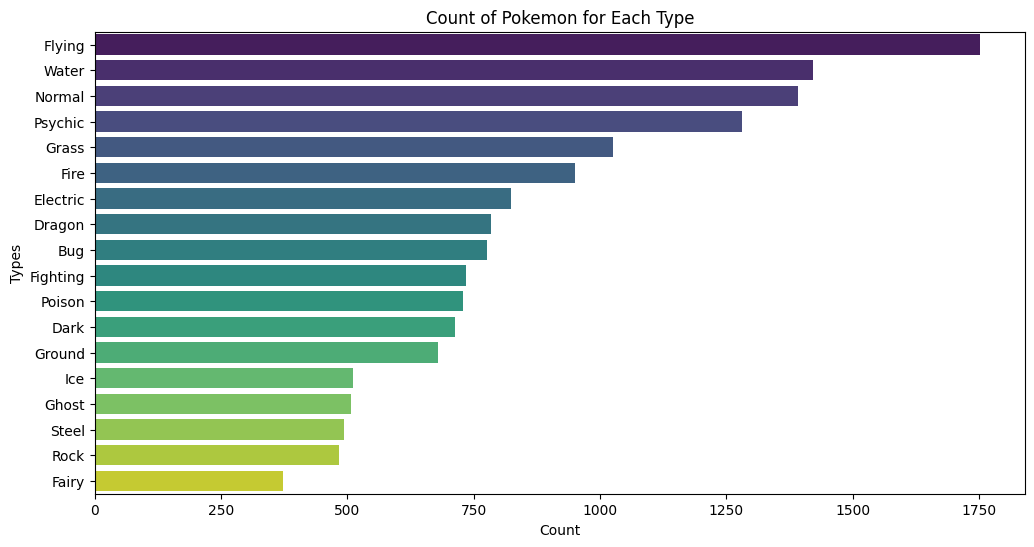

In [53]:
individual_types = pd.DataFrame()

# Iterate through the 'Type1' and 'Type2' columns to stack the individual types
for index, row in results.iterrows():
    if isinstance(row['Type 1'], str):
        individual_types = individual_types.append({'Type': row['Type 1']}, ignore_index=True)
    if isinstance(row['Type 2'], str):
        if row['Type 2'] != 'None':
            individual_types = individual_types.append({'Type': row['Type 2']}, ignore_index=True)

# Count the occurrences of each type
type_counts = individual_types['Type'].value_counts().reset_index()
type_counts.columns = ['Type', 'Count']

# Create a Seaborn bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=type_counts, x='Count', y='Type', palette='viridis')
plt.xlabel('Count')
plt.ylabel('Types')
plt.title('Count of Pokemon for Each Type')
plt.show()

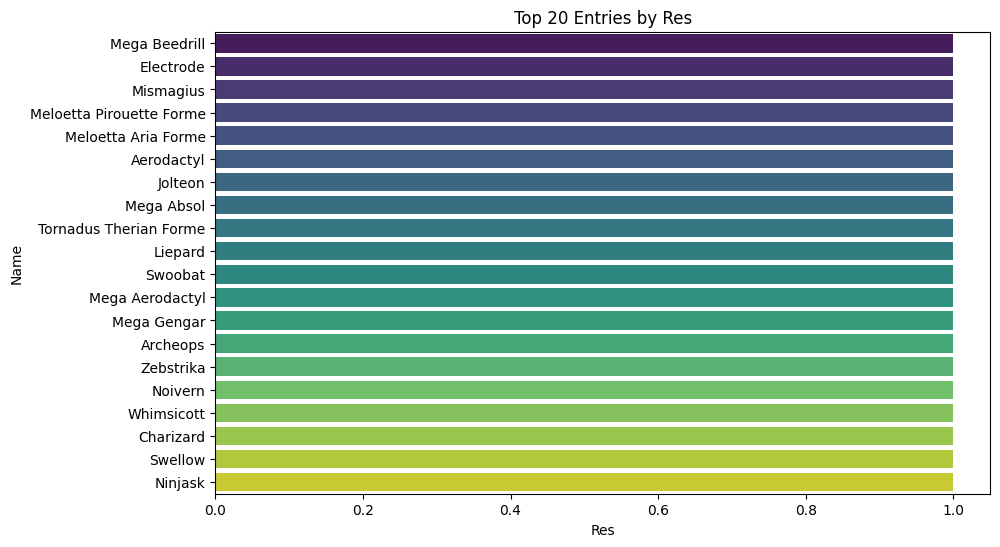

In [48]:
first_battle = results['First'].value_counts()
second_battle = results['Second'].value_counts()
win_counts = results['#'].value_counts()
total_battle = first_battle + second_battle
win_percentage = win_counts / total_battle

ab = pd.DataFrame()
win_percentage.sort_values()
ab["Res"] = win_percentage.sort_values()
ab = ab.reset_index()
ab.rename(columns = {'index':'#'}, inplace = True)
ab= ab.merge(pokemon, on='#', how='left')
ab['Res'] = ab['Res'].fillna(0)
ab['Res'] = ab['Res'].sort_values(ascending=True)
ab = ab.sort_values(by='Res', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Res', y='Name', data=ab.head(20), palette='viridis')
plt.xlabel('Res')
plt.ylabel('Name')
plt.title('Top 20 Entries by Res')
plt.show()

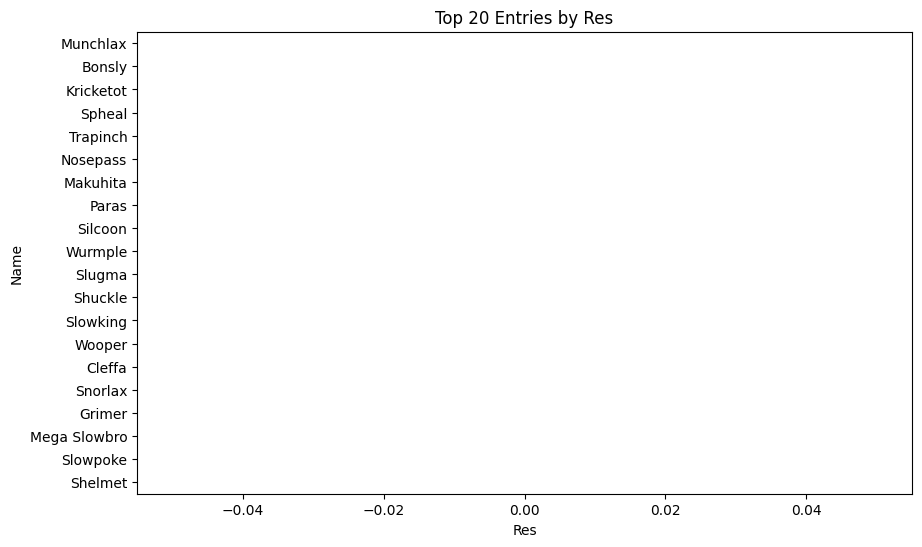

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Res', y='Name', data=ab.tail(20), palette='viridis')
plt.xlabel('Res')
plt.ylabel('Name')
plt.title('Top 20 Entries by Res')
plt.show()

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


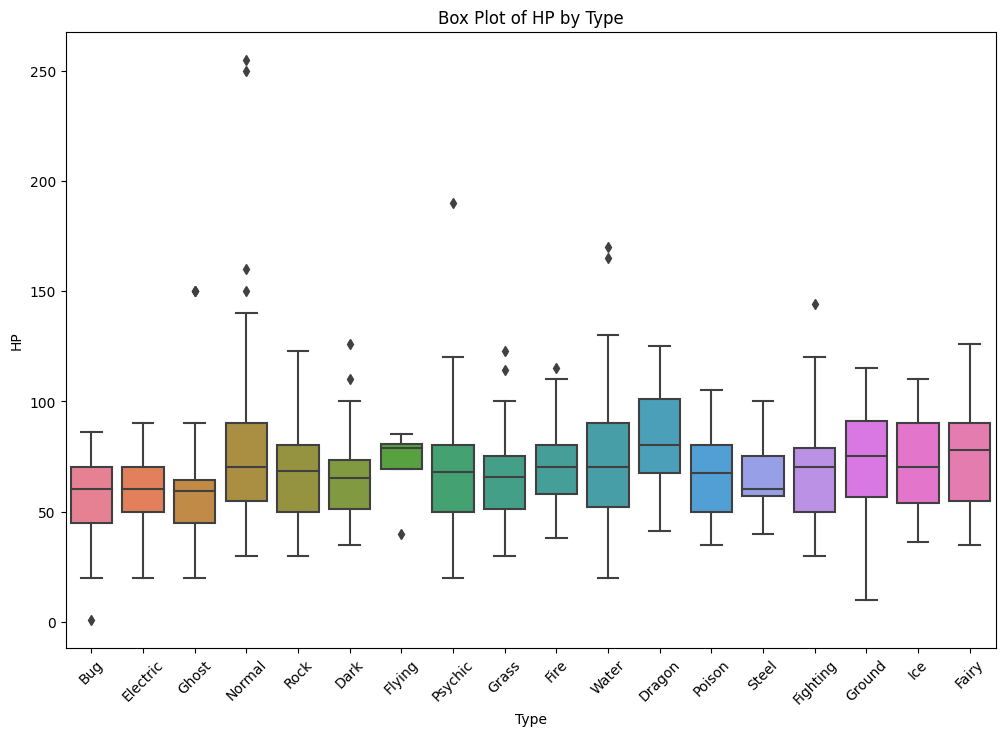

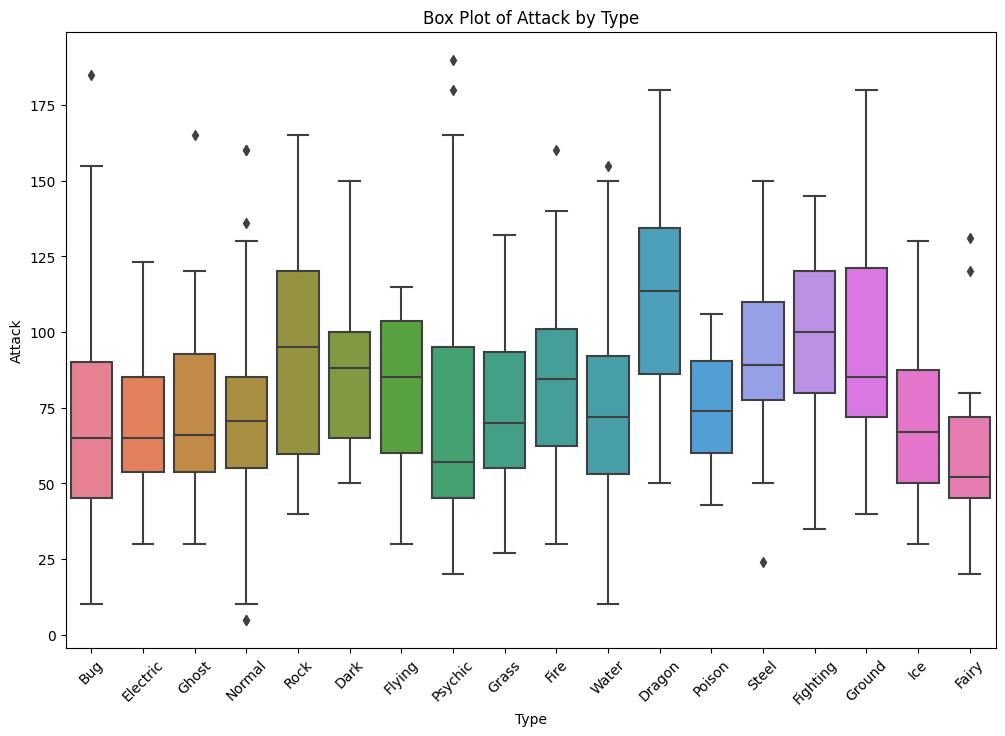

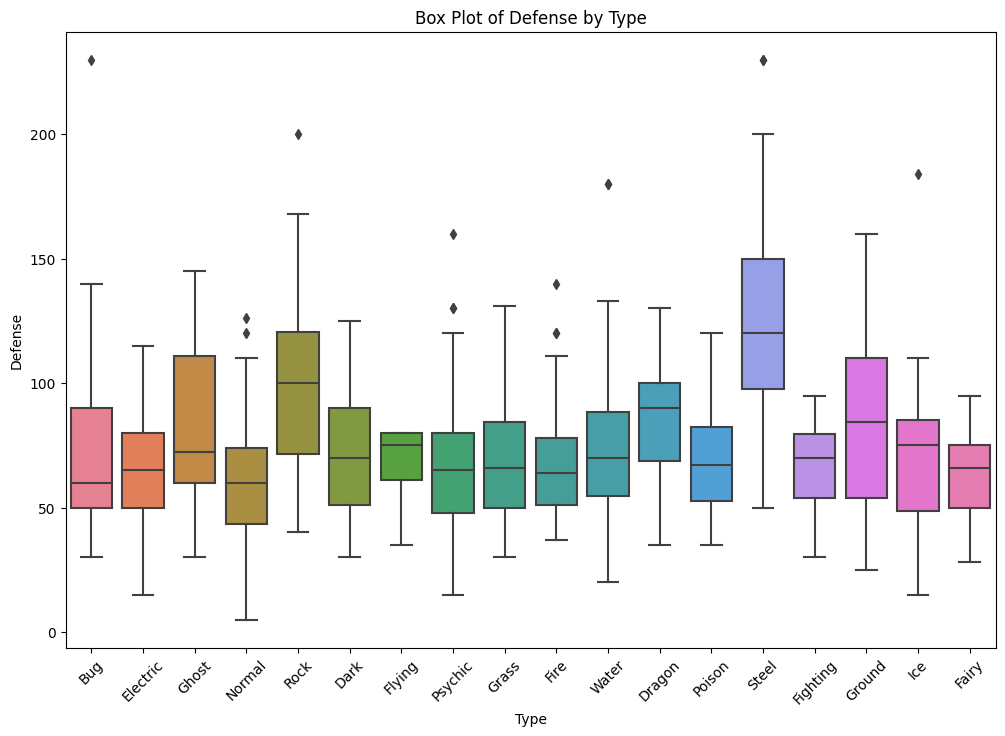

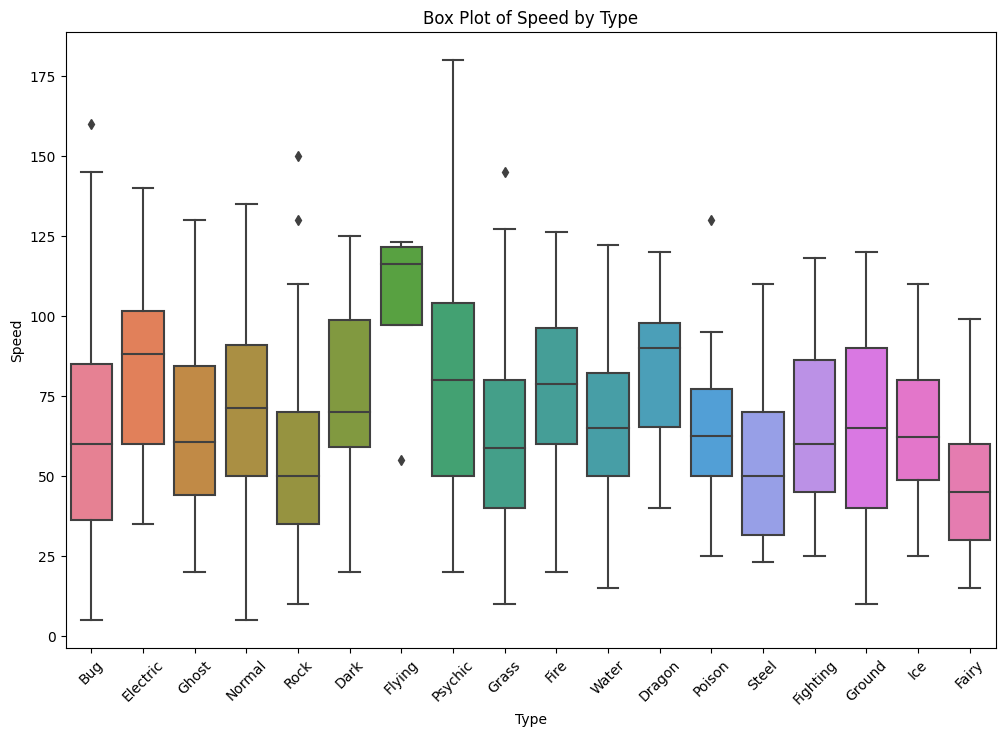

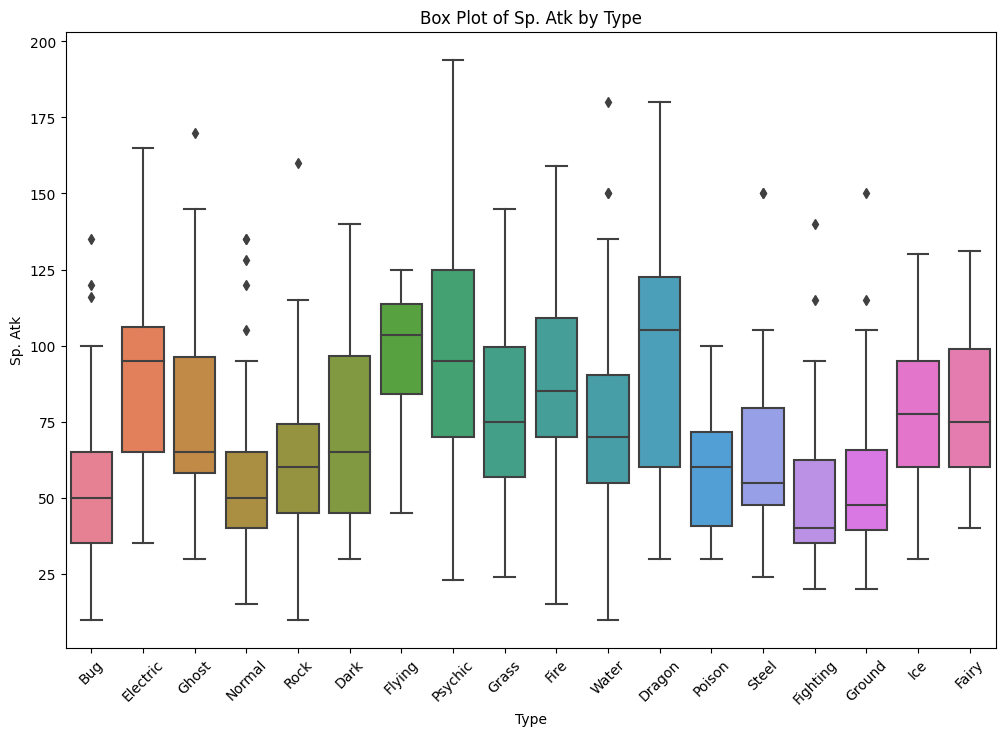

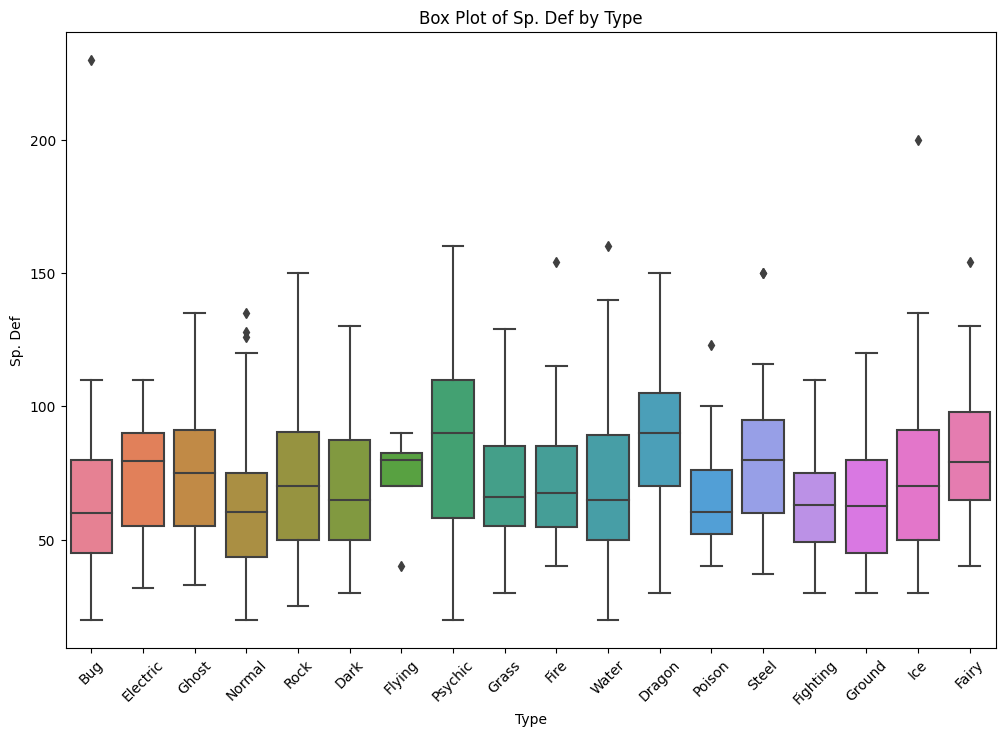

In [50]:
average_stats_by_type = ab.groupby('Type 1').mean()

# Display average statistics for each type and each attribute
attributes = ['HP', 'Attack', 'Defense', 'Speed', 'Sp. Atk', 'Sp. Def']

palette = sns.color_palette("husl", n_colors=len(average_stats_by_type))



for attribute in attributes:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='Type 1', y=attribute, data=ab, palette=palette)
    plt.title(f'Box Plot of {attribute} by Type')
    plt.xlabel('Type')
    plt.ylabel(attribute)
    plt.xticks(rotation=45)
    plt.show()

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


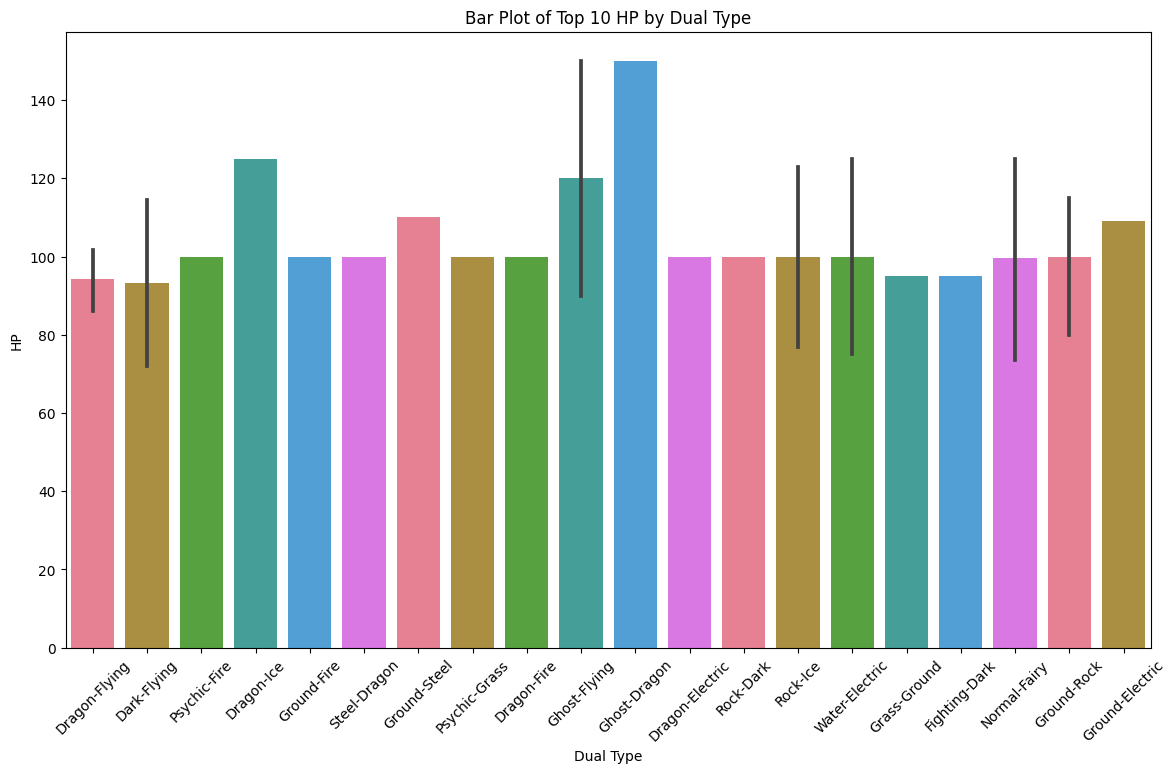

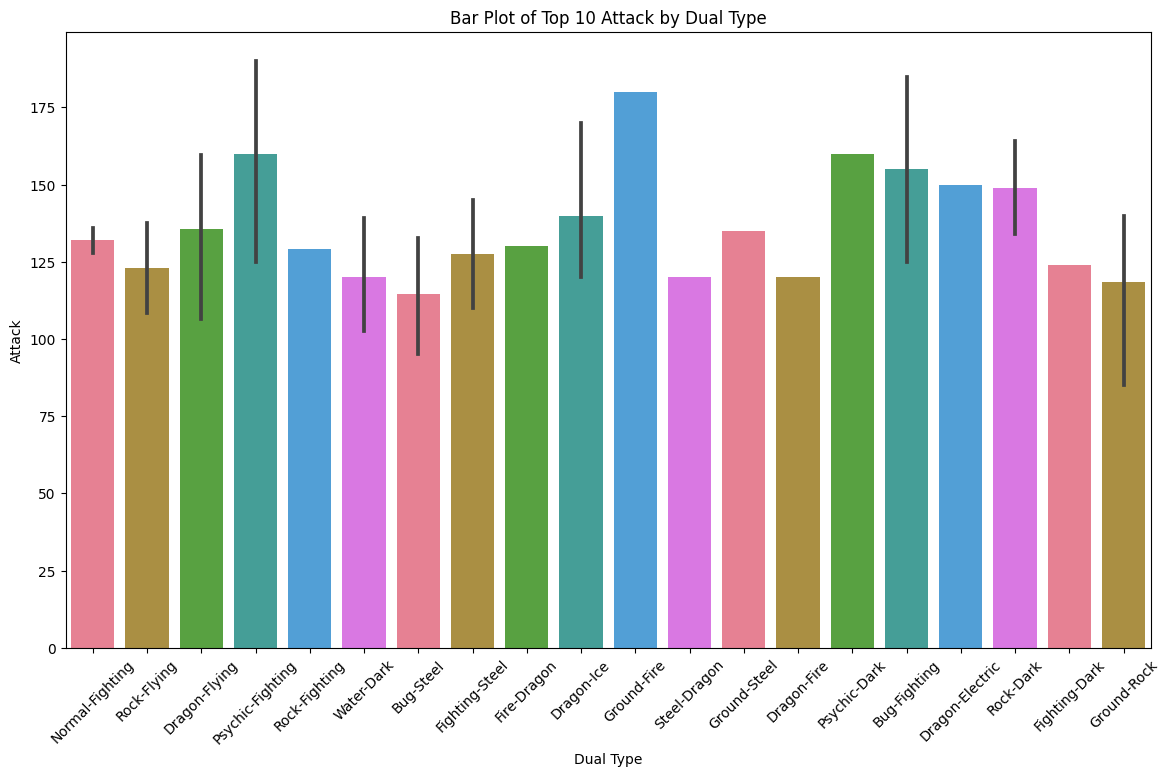

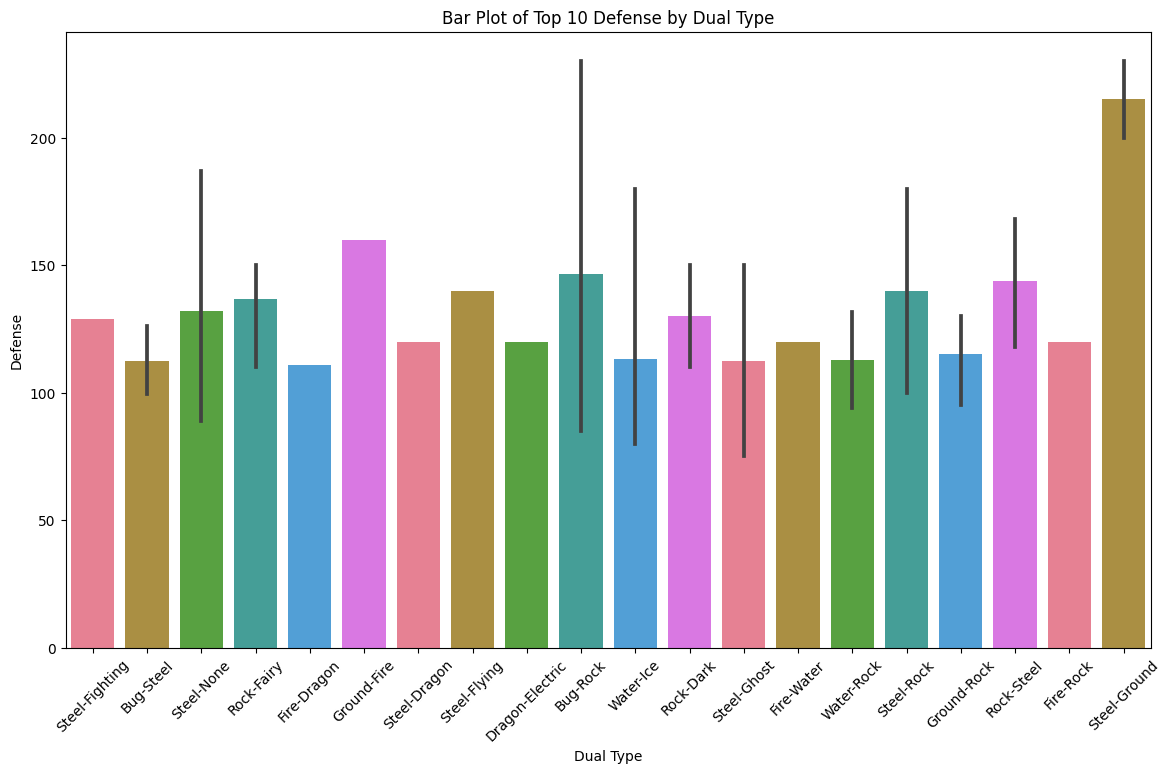

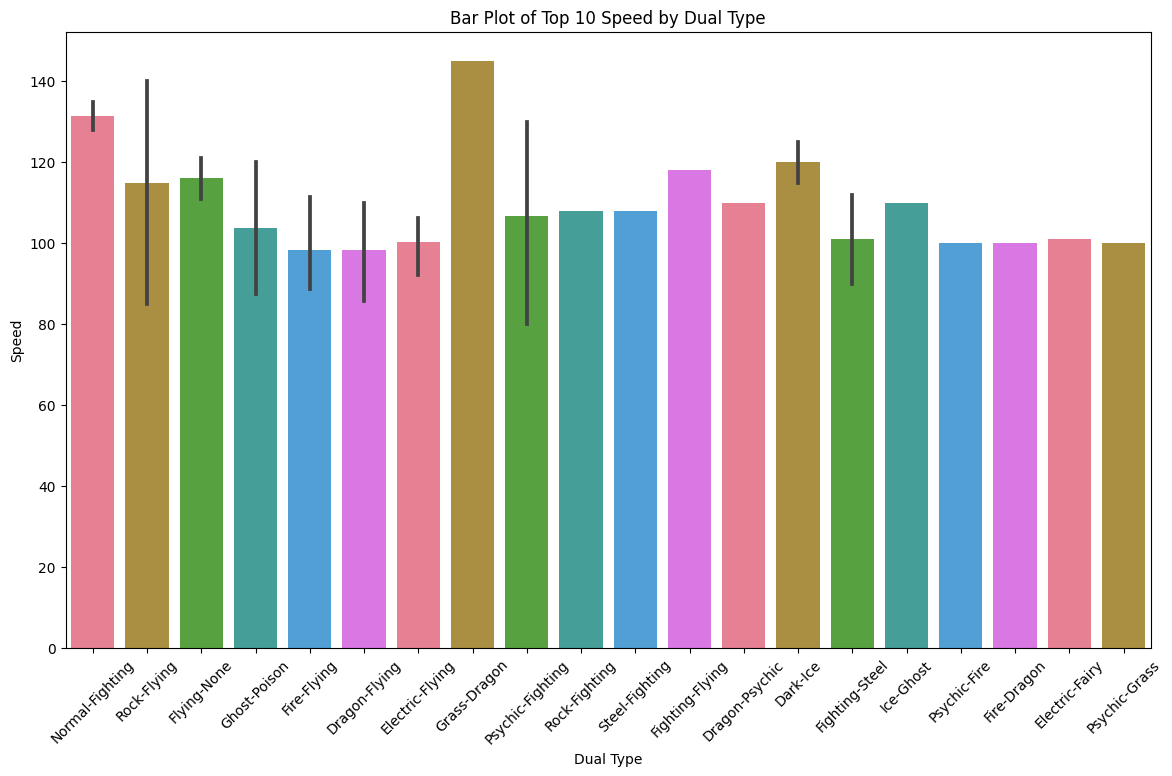

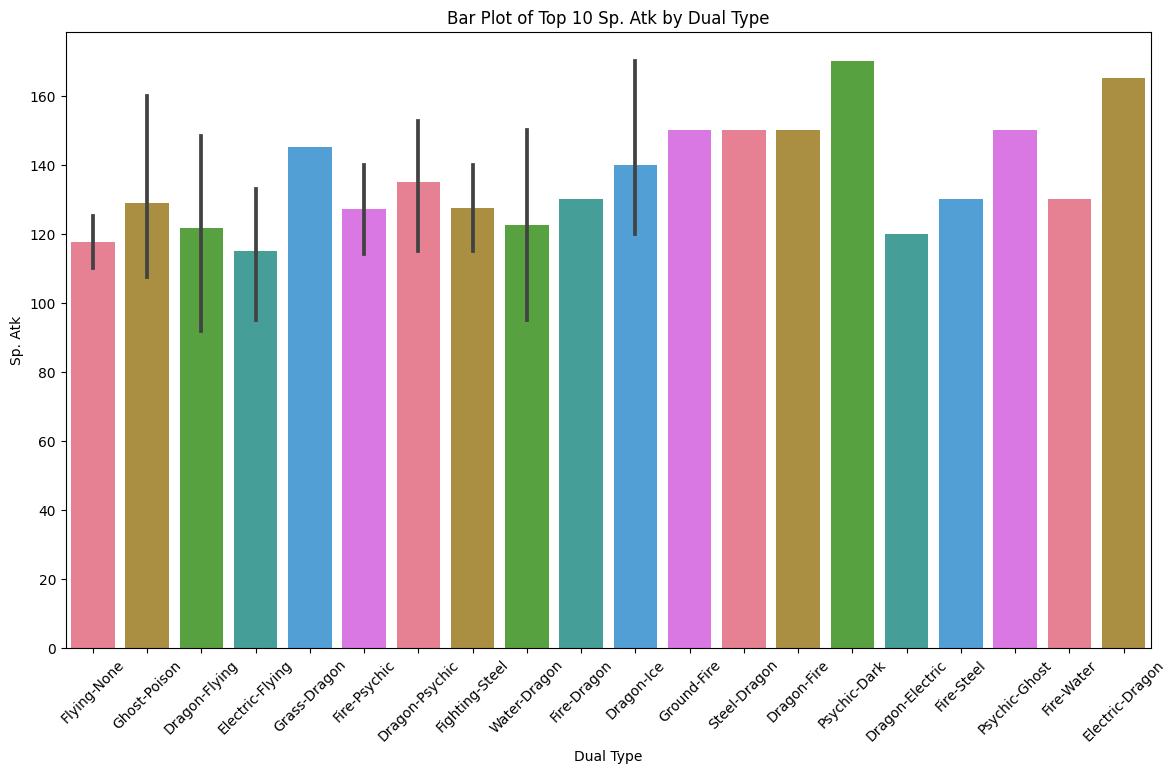

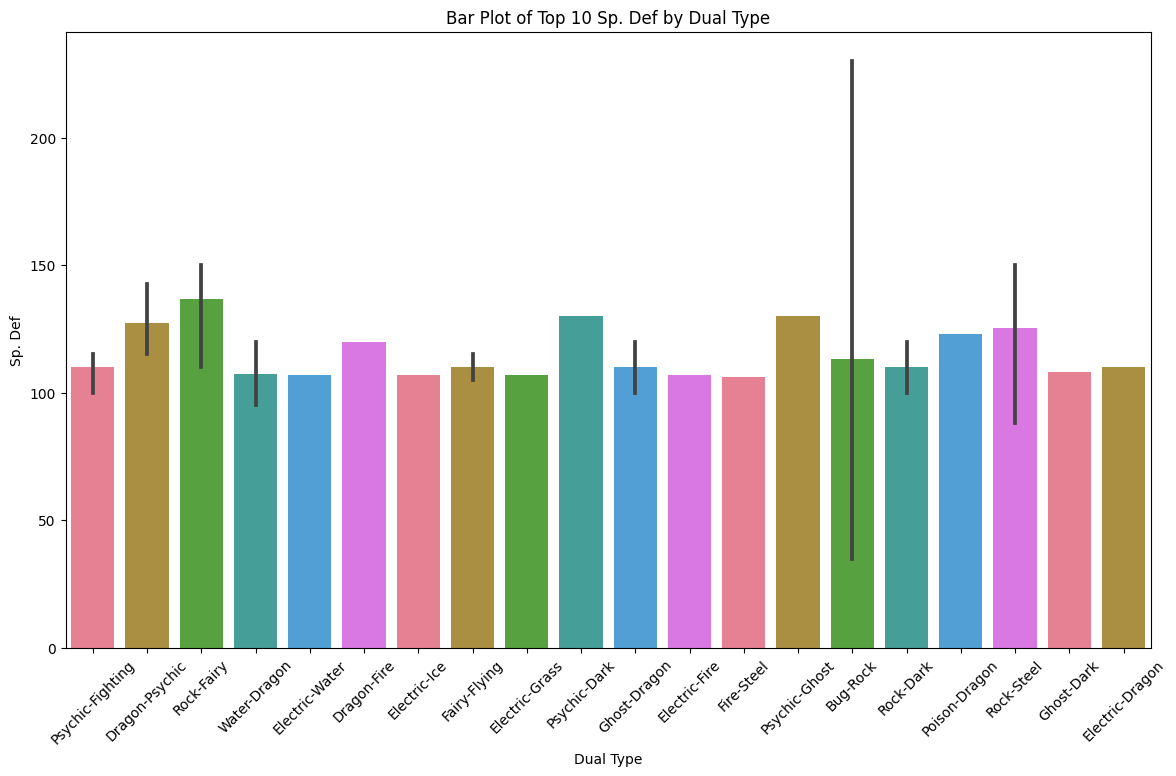

In [51]:


# Assuming 'ab' is your DataFrame
# Example columns: 'Name', 'Type1', 'Type2', 'HP', 'Attack', 'Defense', 'Speed', etc.

# Combine 'Type1' and 'Type2' into a new column 'DualType'
ab['DualType'] = ab['Type 1'] + '-' + ab['Type 2']

# Group by 'DualType' and calculate the mean for each numeric column
average_stats_by_dual_type = ab.groupby('DualType').mean()

# Attributes to plot
attributes = ['HP', 'Attack', 'Defense', 'Speed', 'Sp. Atk', 'Sp. Def']

# Select the top 10 dual types with the highest average for each attribute
top_dual_types_by_attribute = {}
for attribute in attributes:
    top_dual_types_by_attribute[attribute] = average_stats_by_dual_type[attribute].nlargest(20).index

# Set a color palette for different dual types
palette = sns.color_palette("husl", n_colors=len(top_dual_types_by_attribute))

# Create bar plots for each attribute with different colors for each dual type
for attribute in attributes:
    plt.figure(figsize=(14, 8))
    sns.barplot(x='DualType', y=attribute, data=ab[ab['DualType'].isin(top_dual_types_by_attribute[attribute])], palette=palette)
    plt.title(f'Bar Plot of Top 10 {attribute} by Dual Type')
    plt.xlabel('Dual Type')
    plt.ylabel(attribute)
    plt.xticks(rotation=45)
    plt.show()